**Вариант 4**

# Библиотеки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve # для проверки метода Ньютона
from scipy.optimize import minimize

**Часть 1**

# Задание 1. Задача 4.1

<ipython-input-18-4e57dad85606>:19: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, Z1, levels=[0], colors='r', label='f1(x1, x2) = 0')
<ipython-input-18-4e57dad85606>:20: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, Z2, levels=[0], colors='b', label='f2(x1, x2) = 0')


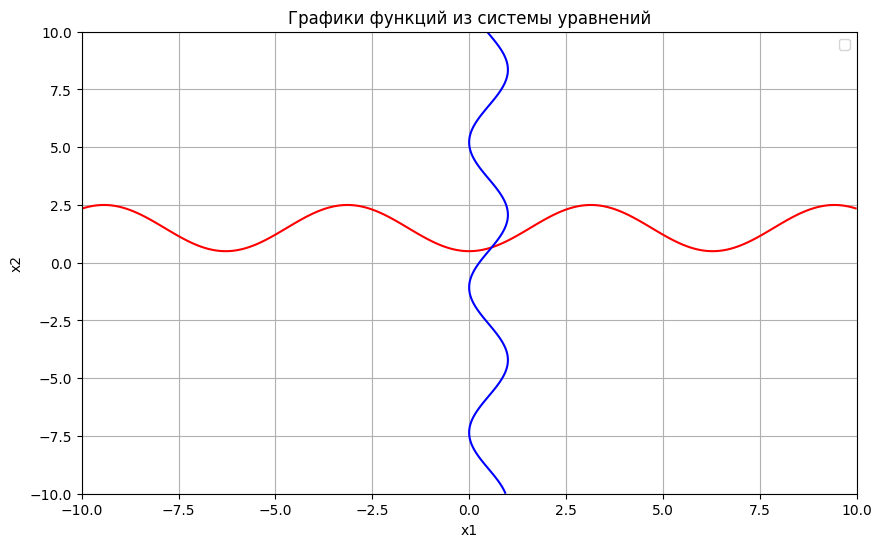

In [ ]:
# определим функции:

def f1(x1, x2):
    return np.cos(x1) + x2 - 1.5

def f2(x1, x2):
    return 2*x1 - np.sin(x2 - 0.5) - 1

x1_values = np.linspace(-10, 10, 400)
x2_values = np.linspace(-10, 10, 400)

# Создадим сетку значений для построения графиков
X1, X2 = np.meshgrid(x1_values, x2_values)
Z1 = f1(X1, X2)
Z2 = f2(X1, X2)

# Построим графики функций
plt.figure(figsize=(10, 6))
plt.contour(X1, X2, Z1, levels=[0], colors='r', label='f1(x1, x2) = 0')
plt.contour(X1, X2, Z2, levels=[0], colors='b', label='f2(x1, x2) = 0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Графики функций из системы уравнений')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def newton_system(func, jacobian, x0, epsilon=1e-6, max_iter=100):
    """
    Решает систему нелинейных уравнений методом Ньютона.

    Аргументы:
    func : функция
        Функция, которая принимает массив x и возвращает массив значений функций.
    jacobian : функция
        Функция, которая вычисляет Якобиан функции func.
    x0 : массив
        Начальное приближение.
    epsilon : float, опционально
        Критерий останова: остановка итераций, если норма изменения x меньше epsilon.
    max_iter : int, опционально
        Максимальное количество итераций.

    Возвращает:
    x : массив
        Приближенное решение.
    iterations : int
        Количество итераций, потребовавшихся для сходимости.
    """
    x = x0.astype(np.float64)  # Приводим к типу float64
    for iterations in range(max_iter):
        delta_x = np.linalg.solve(jacobian(x), -func(x))
        x += delta_x
        if np.linalg.norm(delta_x) < epsilon:
            break
    return x, iterations + 1

# Определим систему уравнений и её Якобиан
def equations(x):
    return np.array([
        np.cos(x[0]) + x[1] - 1.5,
        2*x[0] - np.sin(x[1] - 0.5) - 1
    ])

def jacobian(x):
    return np.array([
        [-np.sin(x[0]), 1],
        [2, -np.cos(x[1] - 0.5)]
    ])

# Найдем корни системы уравнений методом Ньютона
initial_guesses = [(0, 0), (1, 1), (-1, -1)]  # Начальные приближения для каждого корня
roots_newton = []
iterations_newton = []

for guess in initial_guesses:
    root, iterations = newton_system(equations, jacobian, np.array(guess))
    roots_newton.append(root)
    iterations_newton.append(iterations)

print("Корни системы, найденные методом Ньютона с точностью 10^-6:", roots_newton)
print("Количество итераций для каждого корня:", iterations_newton)

Корни системы, найденные методом Ньютона с точностью 10^-6: [array([0.58192615, 0.66459448]), array([0.58192615, 0.66459448]), array([0.58192615, 0.66459448])]
Количество итераций для каждого корня: [5, 4, 5]


In [ ]:
# Найдем корни системы уравнений с использованием встроенной функции fsolve

# Начальные приближения для каждого корня
initial_guesses = [(0, 0), (1, 1), (-1, -1)]

# Список для хранения найденных корней
all_roots_fsolve = []

# Перебираем начальные приближения и находим корни
for guess in initial_guesses:
    root = fsolve(equations, guess, xtol=1e-6)
    all_roots_fsolve.append(root)

print("Все корни системы, найденные с помощью fsolve:", all_roots_fsolve)



Все корни системы, найденные с помощью fsolve: [array([0.58192615, 0.66459448]), array([0.58192615, 0.66459448]), array([0.58192615, 0.66459448])]


# Задание 2. Задача 4.5

In [ ]:
# Координаты трех точек P1, P2 и P3

P1 = np.array([16.5, 5.2, 11.597])
P2 = np.array([8.75, 4.777, 8.697])
P3 = np.array([15.469, 2.815, 5.125])

N = 4 # номер варианта

# Коэффициенты уравнения поверхности
a1 = 8.5 - N * 0.25
a2 = 2.3 + N * 0.3
a3 = 4 + N * 0.1

# Заданное уравнение поверхности
def surface_equation(x, y, z):
    return a1 * x + a2 * y + a3 * z

# Целевая функция для минимизации
def objective_function(coords):
    x, y, z = coords
    return -(x**2 + y**2 + z**2)  # Минимизируем -расстояние до поверхности, чтобы найти ближайшую точку

# Ограничение: точка должна принадлежать поверхности S
constraint = {'type': 'eq', 'fun': lambda coords: surface_equation(*coords)}

# Исходное приближение для метода Ньютона
R = 3 # Размерность пространство
initial_guess = np.zeros(R)

# Минимизация целевой функции с ограничениями
result = minimize(objective_function, initial_guess, constraints=constraint, method='SLSQP')

# Ближайшая к поверхности точка
nearest_point = result.x

# Функция для вычисления расстояния между точками
def distance(p1, p2):
    return np.linalg.norm(p1 - p2)

# Вычисление расстояний от заданных точек до найденной ближайшей точки
distances_to_nearest = [distance(nearest_point, p) for p in [P1, P2, P3]]

# Наиболее удаленная от поверхности точка
farthest_point_index = np.argmax(distances_to_nearest)
farthest_point = [P1, P2, P3][farthest_point_index]

# Вывод результатов
print("Ближайшая к поверхности точка:", nearest_point)
print("Наиболее удаленная от поверхности точка:", farthest_point)


Ближайшая к поверхности точка: [0. 0. 0.]
Наиболее удаленная от поверхности точка: [16.5    5.2   11.597]


**Итог:** Наиболее удаленная от поверхности S точка имеет координаты (16.5, 5.2, 11.597)

In [ ]:
# Полуоси эллипсоида
a1 = 2
a2 = 2
a3 = 2
# Функция для перевода координат в обобщенные координаты u и v
def to_generalized_coordinates(point):
    x, y, z = point
    u = np.arcsin(z / a3)
    v = np.arctan2(y, x)
    return u, v

# Переводим координаты точек в обобщенные координаты
u1, v1 = to_generalized_coordinates(P1)
u2, v2 = to_generalized_coordinates(P2)
u3, v3 = to_generalized_coordinates(P3)

# Уравнение поверхности S в терминах обобщенных координат u и v
def surface_equation(u, v):
    return a1 * np.sin(u) * np.cos(v) + a2 * np.sin(u) * np.sin(v) + a3 * np.cos(u)

# Целевая функция для минимизации
def objective_function(coords):
    u, v = coords
    # Минимизируем -расстояние до поверхности, чтобы найти ближайшую точку
    return -(u**2 + v**2)


# Ограничение: точка должна принадлежать поверхности S
constraint = {'type': 'eq', 'fun': lambda coords: surface_equation(*coords)}

# Исходное приближение для метода Ньютона
initial_guess = np.zeros(2)

# Минимизация целевой функции с ограничениями
result = minimize(objective_function, initial_guess, constraints=constraint, method='SLSQP')

# Ближайшие к поверхности обобщенные координаты
nearest_u, nearest_v = result.x

# Вывод результатов
print("Ближайшие к поверхности обобщенные координаты:", nearest_u, nearest_v)

Ближайшие к поверхности обобщенные координаты: -84.10795207684156 29.67898297770607


<ipython-input-8-6e3a3b22b0f8>:8: RuntimeWarning: invalid value encountered in arcsin
  u = np.arcsin(z / a3)


In [ ]:
# Функция для вычисления расстояния от точки на поверхности S до заданной точки
def distance_to_surface_point(u, v, point):
    surface_point = np.array([
        a1 * np.sin(u) * np.cos(v),
        a2 * np.sin(u) * np.sin(v),
        a3 * np.cos(u)
    ])
    return np.linalg.norm(point - surface_point)

# Вычисление расстояний от найденных ближайших координат до каждой из заданных точек
distances_to_surface = [distance_to_surface_point(nearest_u, nearest_v, p) for p in [P1, P2, P3]]

# Наиболее удаленная от поверхности точка
farthest_point_index = np.argmax(distances_to_surface)
farthest_point = [P1, P2, P3][farthest_point_index]

# Вывод результатов
print("Наиболее удаленная от поверхности S точка:", farthest_point)


Наиболее удаленная от поверхности S точка: [16.5    5.2   11.597]


**Итог:** Наиболее удаленная от поверхности S точка имеет координаты (16.5, 5.2, 11.597), перейдя в обобщённые координаты

In [ ]:
'''
Зададим начальное приближение
такое, что u и v > 0
Возьмём нач. приближение в середине,
то есть u = pi/2, v = pi
'''


# Исходное приближение для метода Ньютона
initial_guess = np.array([np.pi / 2, np.pi])

# Минимизация целевой функции с ограничениями и новым начальным приближением
result = minimize(objective_function, initial_guess, constraints=constraint, method='SLSQP')

# Ближайшие к поверхности обобщенные координаты
nearest_u, nearest_v = result.x

# Вывод результатов
print("Новые ближайшие к поверхности обобщенные координаты:", nearest_u, nearest_v)

Новые ближайшие к поверхности обобщенные координаты: -3.494518035472913e+25 1.8214589149204443e+34


In [ ]:
# Функция для вычисления расстояния от заданной точки до поверхности S в новых обобщенных координатах
def distance_to_surface_point_with_new_coords(point):
    return distance_to_surface_point(nearest_u, nearest_v, point)

# Вычисление ближайшей к поверхности точки для новых обобщенных координат
nearest_to_new_coords = minimize(distance_to_surface_point_with_new_coords, P1, method='Nelder-Mead').x

# Вычисление расстояний от найденных ближайших координат до каждой из заданных точек
distances_to_new_coords = [distance(nearest_to_new_coords, p) for p in [P1, P2, P3]]

# Наиболее удаленная от поверхности точка
farthest_to_new_coords_index = np.argmax(distances_to_new_coords)
farthest_to_new_coords = [P1, P2, P3][farthest_to_new_coords_index]

# Вывод результатов
print("Ближайшая к новым обобщенным координатам точка:", nearest_to_new_coords)
print("Наиболее удаленная от новых обобщенных координат точка:", farthest_to_new_coords)


Ближайшая к новым обобщенным координатам точка: [ 0.791979    1.38713248 -1.20353707]
Наиболее удаленная от новых обобщенных координат точка: [16.5    5.2   11.597]


**Итог:** Наиболее удаленная от новых обобщенных координат точка (16.5, 5.2, 11.597)

**Вывод:** При исходных точка, при переходе в эллипсоидные координаты и при новом приближении (начальном), учитывая что все три координаты для каждой точки положительны - наиболее удалённая точка к поверхности S - одна и та же

# Задание 3. Задача 5.1.4

In [ ]:
# Шаг 1: Задать матрицу системы A и вектор правой части b
A = np.array([[39.6, 0, 17.5, 9.9, 12],
              [79.2, 120, 0, 39.6, 0],
              [19.8, -21, 46, 0, 5],
              [49.5, 19, 19, 89.1, 0],
              [9.9, 25, 10, -39.6, 85]])

b = np.array([38.5, 38.8, 93.7, 43, -49.7])

# Шаг 1: Найти решение системы Ax=b с помощью метода Гаусса
x_gauss = np.linalg.solve(A, b)

print("Шаг 1: Решение с помощью метода Гаусса:")
print(x_gauss)

Шаг 1: Решение с помощью метода Гаусса:
[ 0.44444444  0.1         2.         -0.21212121 -1.        ]


In [ ]:
# Шаг 2: Преобразование системы Ax=b к виду x=Bx+c
D = np.diag(np.diag(A))
L = np.tril(A, k=-1)
U = np.triu(A, k=1)

# Матрица итерационного процесса
B = np.linalg.inv(D - L) @ U
c = np.linalg.inv(D - L) @ b

# Проверка выполнения достаточного условия сходимости
spectral_radius = np.max(np.abs(np.linalg.eigvals(B)))
print("\nШаг 2: Спектральный радиус матрицы B:", spectral_radius)


Шаг 2: Спектральный радиус матрицы B: 0.13343737246367016


In [ ]:
# Шаг 3: Функция для метода Зейделя
def zeid(B, c, initial_guess, max_iter=10):
    x = initial_guess.copy()
    for _ in range(max_iter):
        x = B @ x + c
    return x

# Выполнение метода Зейделя
initial_guess = np.zeros_like(b)
x_seidel = zeid(B, c, initial_guess)

print("\nШаг 3: Решение с помощью метода Зейделя после 10 итераций:")
print(x_seidel)

# Вычисление абсолютной погрешности
absolute_error = np.linalg.norm(x_gauss - x_seidel, ord=np.inf)
print("\nАбсолютная погрешность:", absolute_error)


Шаг 3: Решение с помощью метода Зейделя после 10 итераций:
[ 2.21714916  2.66022335  1.71427388  2.64718665 -0.57565285]

Абсолютная погрешность: 2.8593078635171536


In [ ]:
# Другое начальное приближение
initial_guess = np.array([1, 1, 1, 1, 1])
x_seidel_new = zeid(B, c, initial_guess)

print("\nРешение с другим начальным приближением:")
print(x_seidel_new)

# Вычисление абсолютной погрешности для нового приближения
absolute_error_new = np.linalg.norm(x_gauss - x_seidel_new, ord=np.inf)
print("\nАбсолютная погрешность для нового приближения:", absolute_error_new)


Решение с другим начальным приближением:
[ 2.21714917  2.6602234   1.71427387  2.64718667 -0.57565284]

Абсолютная погрешность для нового приближения: 2.8593078801824725


**Вывод:** При другом начальном приближении абсолютная погрешность остаётся примерно такой же, как и при первом приближении, из-за сходимости метода Зейделя для данной системы уравнений.

# Задача 4. Задание 5.5.1




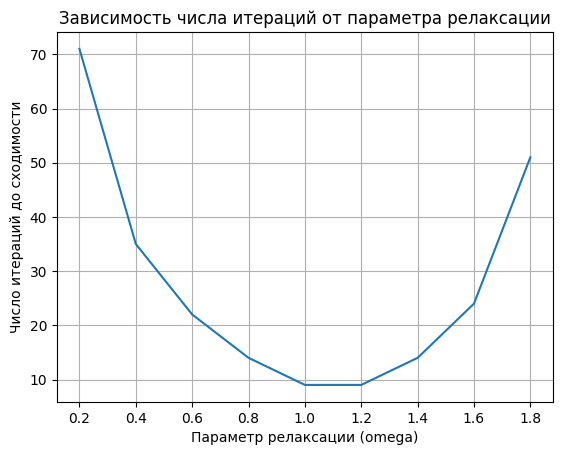

In [ ]:
# Шаг 1: Задание матрицы A и вектора правой части b
A = np.array([[3.5, -1, 0.9, 0.2, 0.1],
              [-1, 7.3, 2, 0.3, 2],
              [0.9, 2, 4.9, -0.1, 0.2],
              [0.2, 0.3, -0.1, 5, 1.2],
              [0.1, 2, 0.2, 1.2, 7]])

b = np.array([1, 2, 3, 4, 5])

# Шаг 2: Функция для метода Зейделя с заданной точностью epsilon
def zeid_with_precision(B, c, initial_guess, epsilon):
    x = initial_guess.copy()
    max_iter = 1000  # ограничение числа итераций, чтобы избежать бесконечного цикла
    for iteration in range(max_iter):
        x_new = B @ x + c
        if np.linalg.norm(x_new - x, ord=np.inf) < epsilon:
            return x_new, iteration + 1  # возвращаем решение и количество итераций
        x = x_new
    print("Решение не сошлось после", max_iter, "итераций.")
    return x, max_iter


# Шаг 3: Вычисление матрицы и вектора для метода релаксации
def relaxation_params(A, omega):
    D = np.diag(np.diag(A))
    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)
    B = np.linalg.inv(D - omega * L) @ ((1 - omega) * D + omega * U)
    c = omega * np.linalg.inv(D - omega * L) @ b
    return B, c

# Шаг 4: Поиск оптимального параметра релаксации omega
eps = 5e-5
omegas = np.arange(0.2, 2.0, 0.2)  # значения omega от 0.2 до 1.8 с шагом 0.2
iterations = []  # список для хранения количества итераций для каждого значения omega

for omega in omegas:
    B, c = relaxation_params(A, omega)
    _, num_iterations = zeid_with_precision(B, c, np.zeros_like(b), eps)
    iterations.append(num_iterations)

# Шаг 5: Построение графика зависимости числа итераций от параметра релаксации
import matplotlib.pyplot as plt

plt.plot(omegas, iterations)
plt.xlabel('Параметр релаксации (omega)')
plt.ylabel('Число итераций до сходимости')
plt.title('Зависимость числа итераций от параметра релаксации')
plt.grid(True)
plt.show()

**Комментарии:** при количестве итераций в диапазоне от 10 до 30 параметр релаксации принадлежит интервалу от 0.6 до 1.6, это может указывать на то, что в этом диапазоне значения ω достаточно эффективны для улучшения сходимости метода. Такие значения  ω обеспечивают достаточное ускорение сходимости при выполнении итераций

In [ ]:
# Функция для метода Зейделя с заданной точностью epsilon
def zeid_with_precision(B, c, initial_guess, epsilon):
    x = initial_guess.copy()
    max_iter = 1000  # ограничение числа итераций, чтобы избежать бесконечного цикла
    for iteration in range(max_iter):
        x_new = B @ x + c
        if np.linalg.norm(x_new - x, ord=np.inf) < epsilon:
            return x_new, iteration + 1  # возвращаем решение и количество итераций
        x = x_new
    print("Решение не сошлось после", max_iter, "итераций.")
    return x, max_iter

# Вычисление матрицы и вектора для метода Зейделя
def zeid_params(A):
    D = np.diag(np.diag(A))
    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)
    B = np.linalg.inv(D - L) @ U
    c = np.linalg.inv(D - L) @ b
    return B, c

# Вычисление параметров для метода Зейделя
B, c = zeid_params(A)

# Решение методом Зейделя с заданной точностью epsilon
epsilon = 6e-6
solution, num_iterations = zeid_with_precision(B, c, np.zeros_like(b), epsilon)

print("Решение методом Зейделя с точностью", epsilon, ":", solution)
print("Количество итераций:", num_iterations)

Решение методом Зейделя с точностью 6e-06 : [0.40769421 0.88798494 1.0753384  1.1359047  1.19927037]
Количество итераций: 10
